In [1]:
# !ls
# # !pip install tensorflow
# !pip list

In [2]:
# 0. 사용할 패키지 불러오기
import tensorflow as tf
import numpy as np
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv3D, MaxPooling3D
import h5py
import pickle
import matplotlib.pyplot as plt

tf.__version__

'2.3.1'

In [3]:
# GPU 사용 가능 여부
from tensorflow.python.client import device_lib 
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9858220446910089402,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 5896987533415790764
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3134364059
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11579814078873969673
 physical_device_desc: "device: 0, name: GeForce GTX 1050, pci bus id: 0000:01:00.0, compute capability: 6.1",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 3006992838557050475
 physical_device_desc: "device: XLA_GPU device"]

In [4]:
# def plot_voxel(voxels):    
#     colors = np.where(voxels, "blue", "red")
#     fig = plt.figure()
#     ax = fig.gca(projection='3d')
    
#     template = np.ones(voxels.shape, dtype=object)
#     ax.voxels(template, facecolors=colors, edgecolor='k')
#     ax.set(xlabel='x', ylabel='y', zlabel='z')
#     plt.show()

In [5]:
with open('data/processed/image.pkl', 'rb') as f:
    image = pickle.load(f)

with open('data/processed/label_11.pkl', 'rb') as f:
    label_11 = pickle.load(f)

with open('data/processed/label_22.pkl', 'rb') as f:
    label_22 = pickle.load(f)

with open('data/processed/label_33.pkl', 'rb') as f:
    label_33 = pickle.load(f)

In [6]:
print(image.shape)
print(label_11.shape)
print(label_22.shape)
print(label_33.shape)

(6000, 30, 30, 30, 1)
(6000, 1)
(6000, 1)
(6000, 1)


In [7]:
image_train = image[:5900]
label_train = label_11[:5900]


# image_val = image[5000:5400]
# label_val = label_11[5000:5400]

image_test = image[5900:]
label_test = label_11[5900:]

In [26]:
# 2. 모델 Basic
from tensorflow.keras.layers import BatchNormalization, Dropout, Activation

def model_basic():
    model = Sequential()
    model.add(Conv3D(32, (3, 3, 3), input_shape=(30, 30, 30, 1)))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Conv3D(32, (3, 3, 3)))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1))

    model.summary()
    
    return model


def model_advanced():
    model = Sequential()
    model.add(Conv3D(32, (12, 3, 3), input_shape=(30, 30, 30, 1)))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Conv3D(32, (6, 3, 3)))
    # model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 2)))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    # model.add(Dropout(0.5))
    model.add(Dense(1))

    model.summary()
    
    return model


In [226]:
# 3. 모델 학습과정 설정하기
model_name = "model_advanced"

if model_name == "model_basic":
    model = model_basic()
elif model_name == "model_advanced":
    model = model_advanced()

model.compile(loss='mean_absolute_percentage_error', optimizer='adam')

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_11 (Conv3D)           (None, 19, 28, 28, 32)    3488      
_________________________________________________________________
activation_10 (Activation)   (None, 19, 28, 28, 32)    0         
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 9, 14, 14, 32)     0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 4, 12, 12, 32)     55328     
_________________________________________________________________
activation_11 (Activation)   (None, 4, 12, 12, 32)     0         
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 2, 6, 6, 32)       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)             

In [29]:
# 4. 모델 학습시키기
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10)
hist = model.fit(
    image_train, 
    label_train, 
    batch_size=1, 
    epochs=180,
    validation_split = 0.2,
#     callbacks=[early_stopping]
    # validation_data=(image_val, label_val), 
)

Epoch 1/200
4720/4720 [==============================] - 27s 6ms/step - loss: 14.3039 - val_loss: 8.3019
Epoch 2/200
4720/4720 [==============================] - 27s 6ms/step - loss: 8.4375 - val_loss: 7.9739
Epoch 3/200
4720/4720 [==============================] - 27s 6ms/step - loss: 8.1194 - val_loss: 7.7068
Epoch 4/200
4720/4720 [==============================] - 27s 6ms/step - loss: 7.6123 - val_loss: 6.9743
Epoch 5/200
4720/4720 [==============================] - 27s 6ms/step - loss: 6.6970 - val_loss: 5.6543
Epoch 6/200
4720/4720 [==============================] - 27s 6ms/step - loss: 5.1801 - val_loss: 4.7197
Epoch 7/200
4720/4720 [==============================] - 27s 6ms/step - loss: 3.9700 - val_loss: 4.1977
Epoch 8/200
4720/4720 [==============================] - 27s 6ms/step - loss: 3.6377 - val_loss: 3.3608
Epoch 9/200
4720/4720 [==============================] - 27s 6ms/step - loss: 3.4550 - val_loss: 3.2512
Epoch 10/200
4720/4720 [==============================] - 27s 6

In [30]:
# 모델 저장

model.save(model_name)

with open(f"{model_name}/hist.pkl", "wb") as f:
    pickle.dump(hist.history, f)

INFO:tensorflow:Assets written to: model_advanced\assets


In [212]:
# 여기서부턴 복구
model_name = "model_advanced"

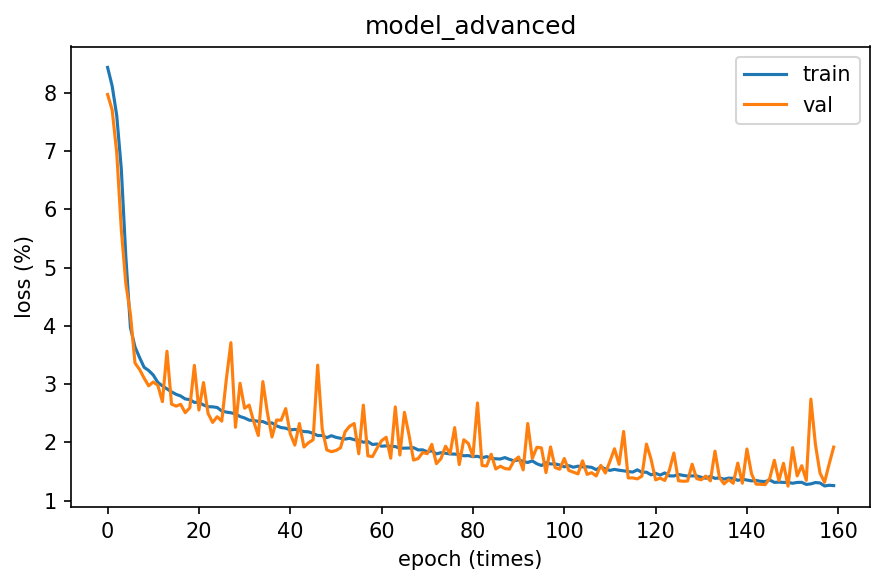

In [213]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

with open(f"{model_name}/hist.pkl", "rb") as f:
    data = pickle.load(f)

plt.figure(dpi=150)
plt.title(f"{model_name}")
plt.plot(data['loss'][1:])
plt.plot(data['val_loss'][1:])
plt.ylim()
plt.ylabel('loss (%)')
plt.xlabel('epoch (times)')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.savefig(f"{model_name}/fig.png")
plt.show()

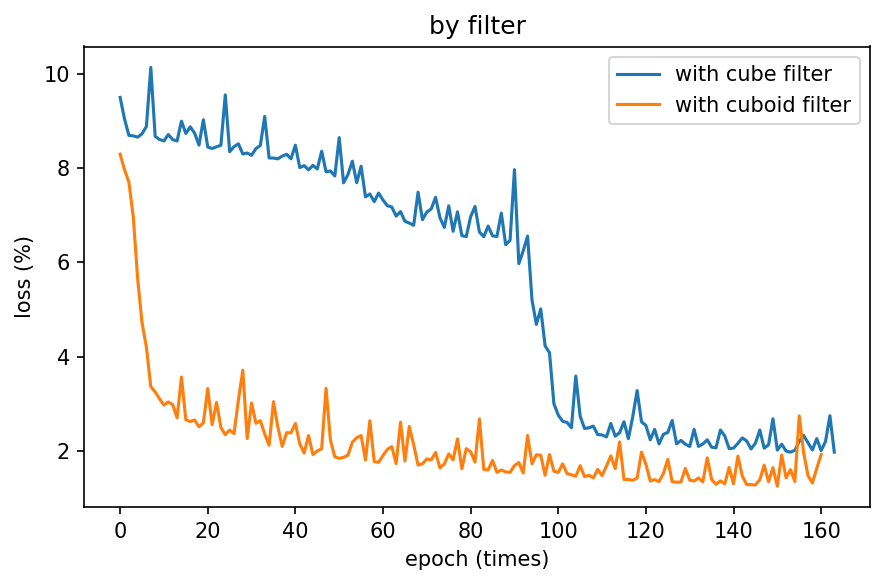

In [214]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

with open(f"model_basic/hist.pkl", "rb") as f:
    data1 = pickle.load(f)
with open(f"model_advanced/hist.pkl", "rb") as f:
    data2 = pickle.load(f)

plt.figure(dpi=150)
plt.title("by filter")
# plt.plot(data1['loss'][1:])
plt.plot(data1['val_loss'])
# plt.plot(data2['loss'][1:])
plt.plot(data2['val_loss'])

# plt.ylim(0, 11)
plt.ylabel('loss (%)')
plt.xlabel('epoch (times)')
plt.legend(['with cube filter', 'with cuboid filter'], loc='upper right')


plt.tight_layout()
plt.savefig(f"{model_name}/fig.png")
plt.show()

In [215]:
reconstructed_model = tf.keras.models.load_model(model_name)

In [216]:
# 6. 모델 평가하기

score = reconstructed_model.evaluate(image_test, label_test, batch_size=1)
print("score:", score)

100/100 [==============================] - 0s 2ms/step - loss: 1.8407
score: 1.8407368659973145


In [219]:
temp = image_test[6,:,:,:].reshape(1,30,30,30,1)

import time 
start = time.time()
yhat_test = reconstructed_model.predict(image_test, batch_size=1)
# yhat_test = reconstructed_model.predict(temp, batch_size=1)
print((time.time() - start)/100)

sum = 0
# print(yhat_test)

for i in range(len(yhat_test)):
    error_rate = abs(yhat_test[i][0] - label_test[i][0]) / label_test[i][0] * 100
    sum += error_rate
    # print('Real: %d \t Prediction: %.1f \t Error: %.2f %%' % (label_test[i][0], yhat_test[i][0], error_rate))

print("average error rate: %.2f %%" % (sum / len(yhat_test)))

with open(f"{model_name}/result.txt", "w") as f:
    f.write("average error rate: %.2f %%" % (sum / len(yhat_test)))

0.0018001270294189453
average error rate: 1.84 %


In [220]:
# summarize filter shapes
for i, layer in enumerate(reconstructed_model.layers):
	# check for convolutional layer
	if 'conv' not in layer.name:
		continue
	# get filter weights
	filters, biases = layer.get_weights()
	print(i, layer.name, filters.shape)

0 conv3d_7 (12, 3, 3, 1, 32)
3 conv3d_8 (6, 3, 3, 32, 32)


In [221]:
# conv1
filters1, biases1 = reconstructed_model.layers[0].get_weights()
filters1 = filters1.reshape(12, 3, 3, 32)
# filters1 = filters1.reshape(3, 3, 3, 32)
print(filters1.shape)

#conv2
filters2, biases2 = reconstructed_model.layers[3].get_weights()
filters2 = filters2.reshape(6, 3, 3, 32*32)
# filters2 = filters2.reshape(3, 3, 3, 32*32)

print(filters2.shape)

(12, 3, 3, 32)
(6, 3, 3, 1024)


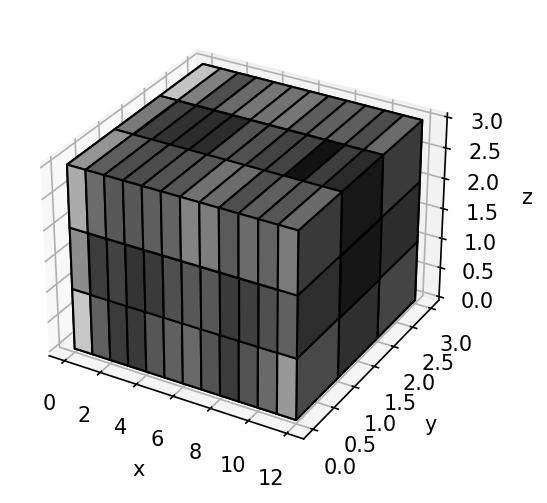

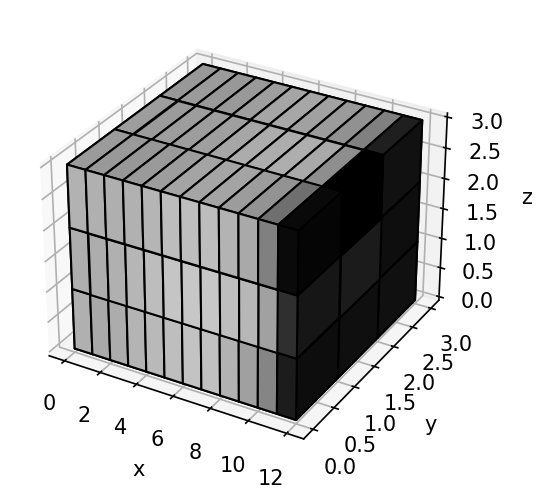

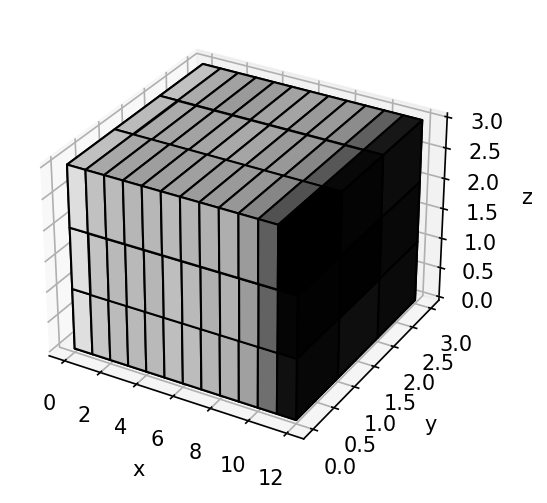

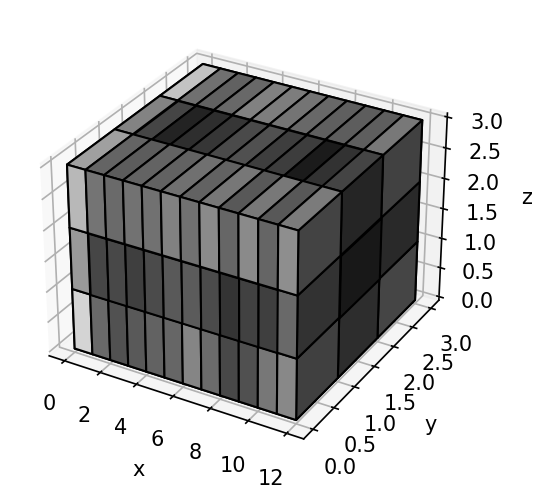

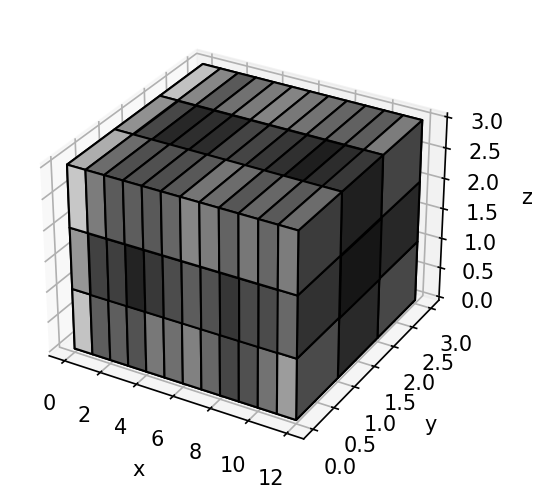

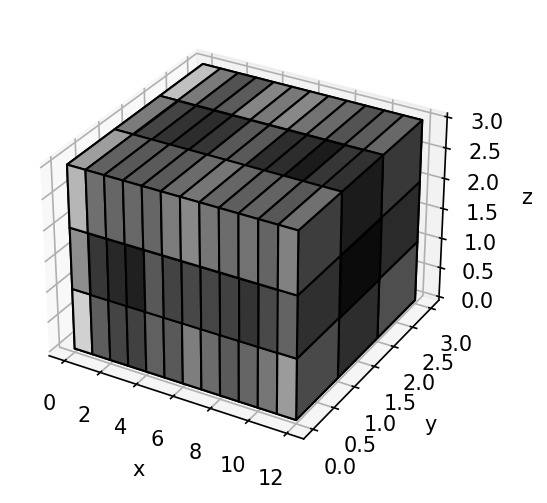

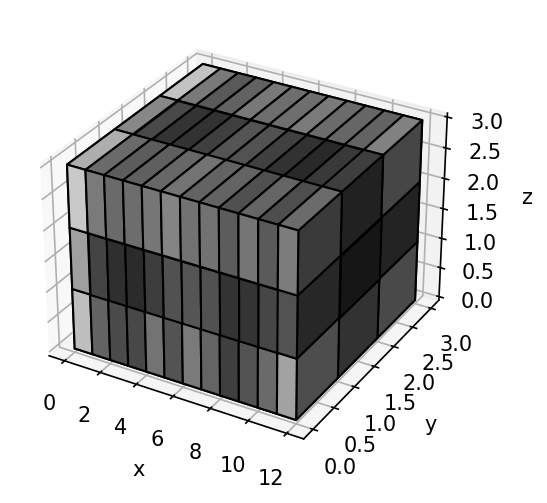

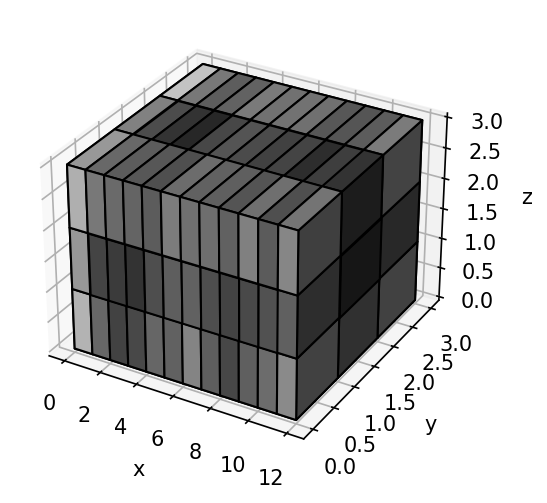

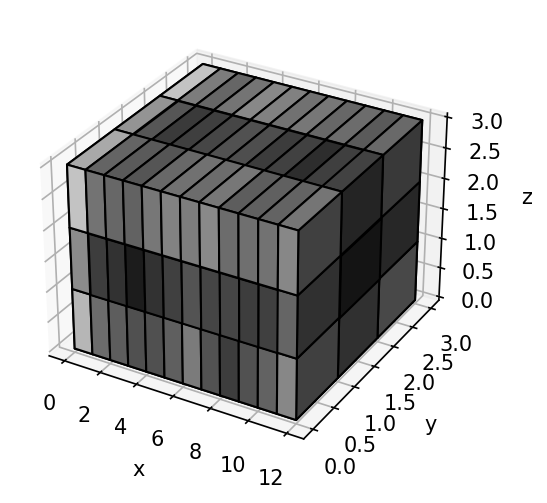

second


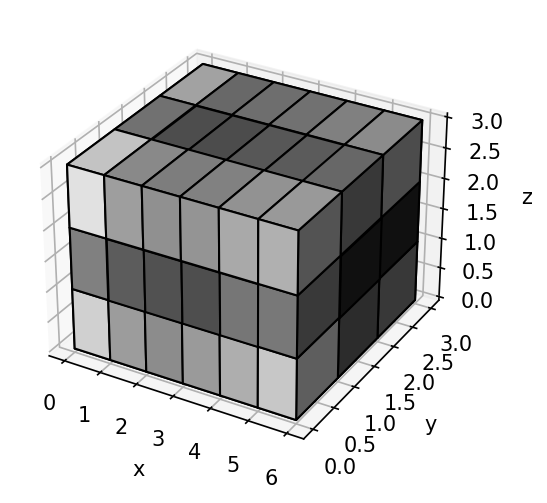

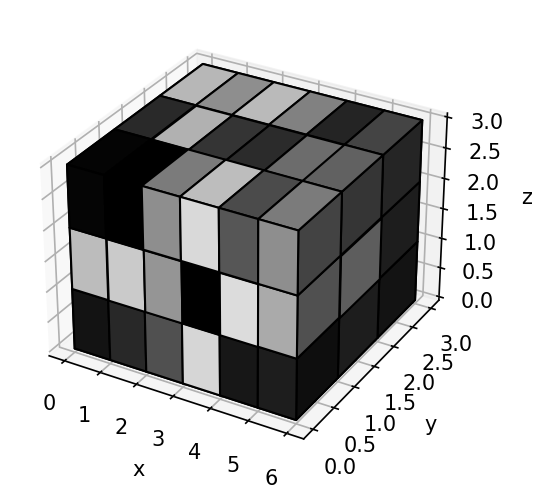

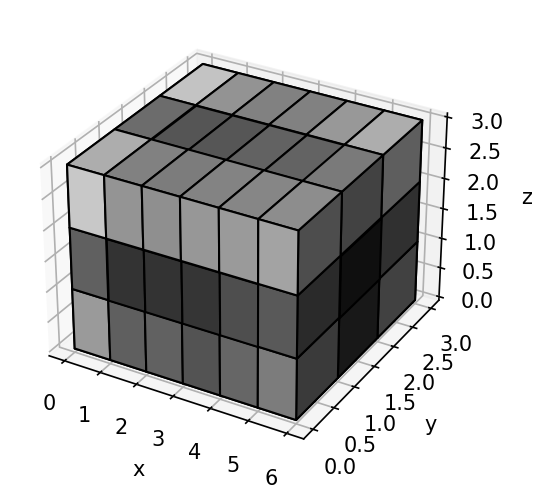

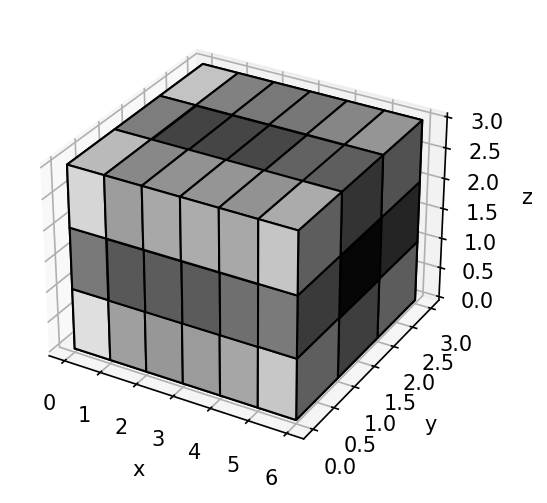

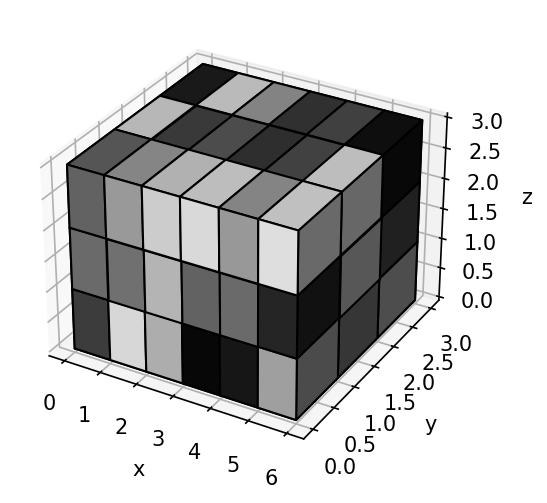

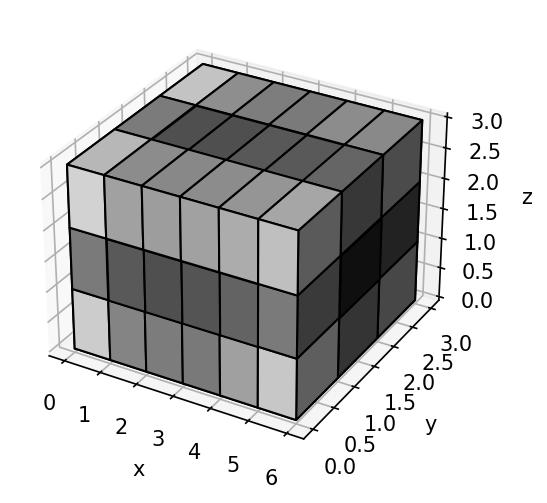

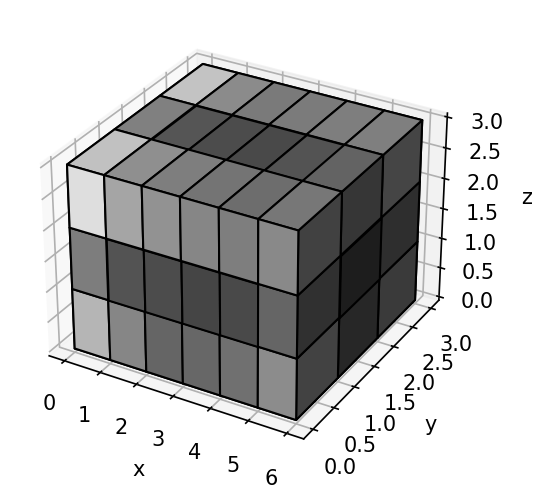

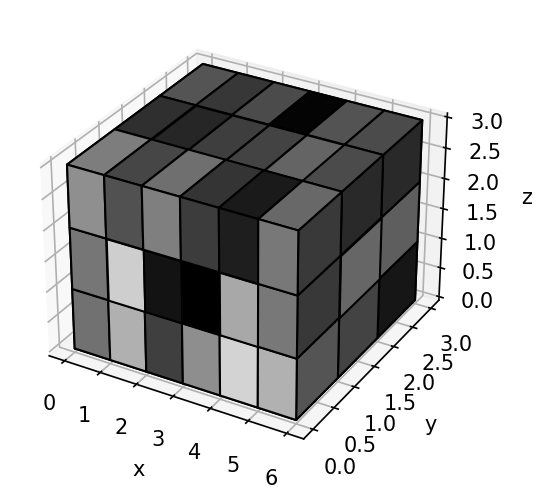

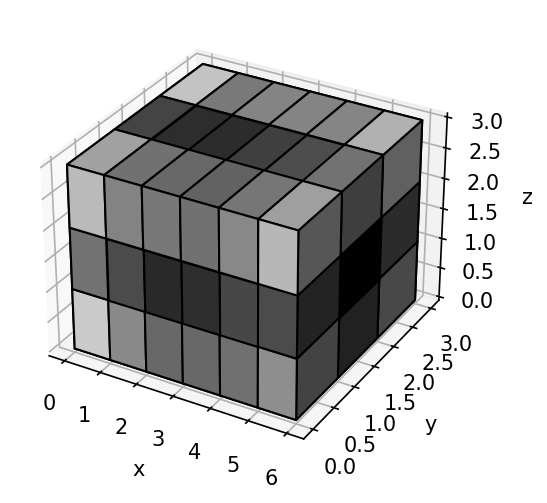

In [222]:
def plot_voxel(voxels):
    voxels = (voxels - voxels.min()) / (voxels.max() - voxels.min())
    colors = voxels.astype(np.str_)

    fig = plt.figure(dpi=150)
    ax = fig.gca(projection='3d')
    
    template = np.ones(voxels.shape, dtype=object)
    ax.voxels(template, facecolors=colors, edgecolor='k')
    ax.set(xlabel='x', ylabel='y', zlabel='z')
    
    plt.show()
    
for i in range(1,10):
    plot_voxel(filters1[:, :, :, i])
    
print("second")
for i in range(1,10):
    plot_voxel(filters2[:, :, :, i])

In [224]:
from tensorflow.keras.utils import plot_model
plot_model(reconstructed_model,show_shapes=True, show_layer_names=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
